# I. Equations différentielles (EDO)

## I.1 Intro

Differential equation are equations that link a function and its derivatives. The simplest
differential equation is :

y 0 (t) = y(t)

To solve this equation, we are looking for a function y, that derivative is equals to y.
The only known functions that have this property are the exponential functions y(t) =
C exp(t), with C a constant. Here the solution is a family of function (you can change
the value of C to have different solutions). In order to have a unique solution you need to
add an information, for example, the value of the function at t = 0 :

y 0 (t) = y(t) and y(0) = 2

Here the solution is y(t) = 2 exp(t) (and it is the only solution).

## I.2 Solving ODE with Python

Differential equations can be solved in Python with the scipy.integrate package
using the function odeint. To solve differential equation with Python you need to follow
the correct syntax.

In [2]:
#y = odeint(model, y0, t)

— model : Function name that returns derivative values at requested y and t values
as dydt = model(y,t) (in the previous example model(y,t)= y)
— y0 : Initial conditions of the differential states (to have a unique solution, in the
previous example y0 = 2)
— t : Time points at which the solution should be reported. (Additional internal points
are often calculated to maintain accuracy of the solution but are not reported.)
— y : return of odeint, the solution of the differential equation with condition y0
computed at time points t

An example of using odeint is with the following differential equation with parameter
k = 0.3, the initial condition y0=5 and the following differential equation.

dy/dt = −ky(t)

1. The Python code first imports the needed Numpy, Scipy, and Matplotlib packages.
The model, initial conditions, and time points are defined as inputs to odeint to
numerically calculate the solution y at the asked time points.
Copy the following code, and run it.


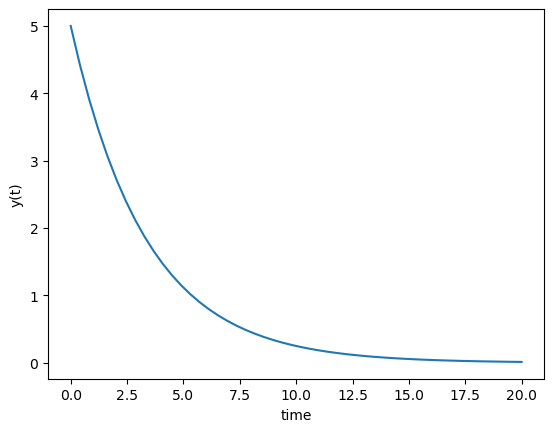

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt

def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20) #by default size of linspace is 50

# solve ODE
y = odeint(model,y0,t)

# plot results : the solution over time
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()


2. An optional fourth input is args that allows additional information to be passed
into the model function. The args input is a tuple sequence of values. The argument
k is now an input to the model function by including an addition argument. Copy
the following codes, and run them to understand how odeint works.

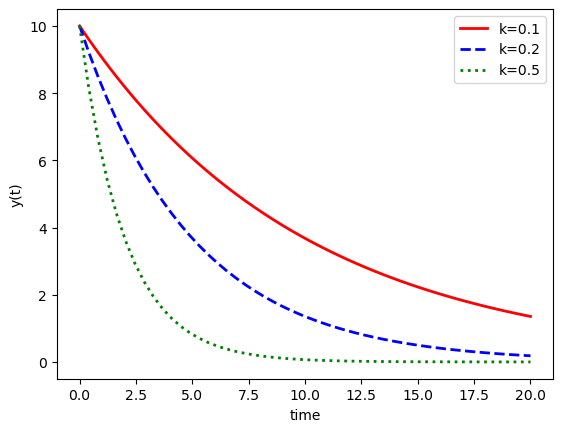

In [4]:
# function that returns dy/dt
def model(y,t,k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 10

# time points
t = np.linspace(0,20)

# solve ODEs for different values of parameter k (same initial condition)
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

# II Simple models

1. Play with the previous model by changing the initial condition.

2. Solve the differential equation dy/dt = = −ky^2 (t) with any initial condition

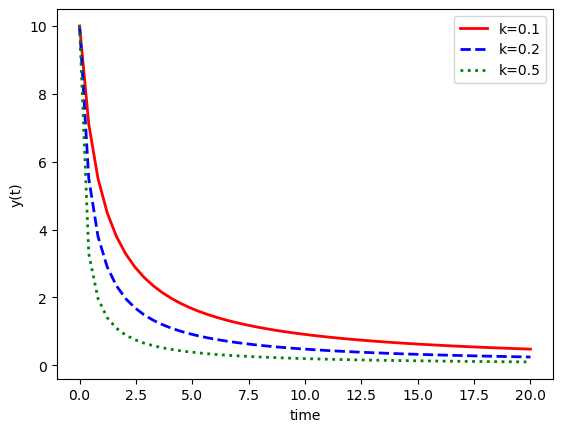

In [5]:
# function that returns dy/dt
def model(y,t,k):
    dydt = -k * y**2
    return dydt

# initial condition
y0 = 10

# time points
t = np.linspace(0,20)

# solve ODEs for different values of parameter k (same initial condition)
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

3. We want to do 2D models by using this function (now y is a vector of size 2) :

In [6]:
def simple(y,t):
    a = y[0]
    b = y[1]
    dadt = a-b
    dbdt =b-a
    return [dadt,dbdt]

How do we change the code to make it work ? What about the initial condition ?

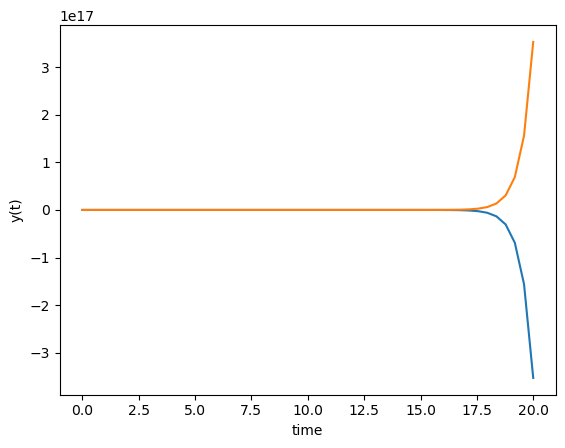

In [7]:
# initial condition
y0 = [5,8]

# time points
t = np.linspace(0,20) #by default size of linspace is 50

# solve ODE
y = odeint(simple,y0,t)
# plot results : the solution over time
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()


# III Real models

## 3.1 Predatory prey - Lotka-Volterra model

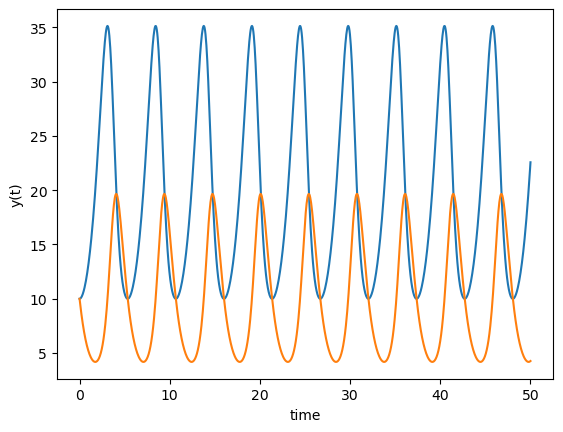

[[10.         10.        ]
 [10.00928036  9.63169472]
 [10.03669769  9.27759514]
 ...
 [21.30413209  4.20606426]
 [21.92965641  4.23164996]
 [22.57008004  4.26752021]]


In [8]:
r = 1
mu = 0.1
p = 0.075
l = 1.5

def lvmodel(y,t):
    a = y[0]
    b = y[1]
    dadt = r*a-mu*a*b
    dbdt = p*a*b-l*b
    return [dadt,dbdt]

# initial condition
y0 = [10,10]

# time points
t = np.linspace(0,50,1000) #by default size of linspace is 50

# solve ODE
y = odeint(lvmodel,y0,t)

# plot results : the solution over time
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()
print(y)
    

## 3.2 Epidemic model - SIR

1. Code and solve the system (initial condition S(0) = 0.9, I(0) = 0.1, R(0) = 0).

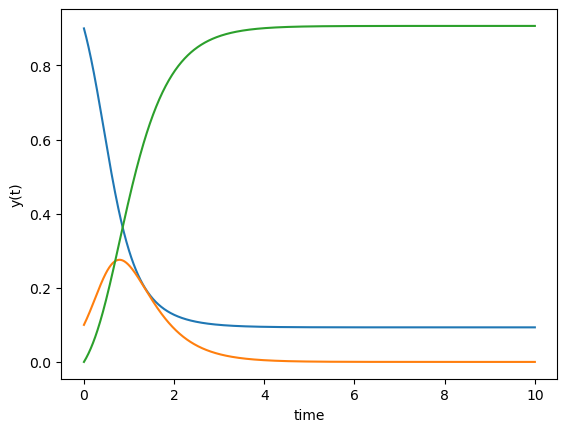

[[9.00000000e-01 1.00000000e-01 0.00000000e+00]
 [8.95450370e-01 1.02522437e-01 2.02719381e-03]
 [8.90810392e-01 1.05084339e-01 4.10526921e-03]
 ...
 [9.32788325e-02 4.83619193e-07 9.06720684e-01]
 [9.32788302e-02 4.76273377e-07 9.06720693e-01]
 [9.32788280e-02 4.69040465e-07 9.06720703e-01]]


In [9]:
A = 2
B = 5

def sir(y,t):
    s = y[0]
    i = y[1]
    r = y[2]
    dsdt = -B*s*i
    didt = B*s*i - A*i
    drdt = A*i
    return[dsdt,didt,drdt]
    
# initial condition
y0 = [0.9,0.1,0]

# time points
t = np.linspace(0,10,1000) #by default size of linspace is 50

# solve ODE
y = odeint(sir,y0,t)

# plot results : the solution over time
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()
print(y)

## 3.3 Chaotic Attractor Lorentz

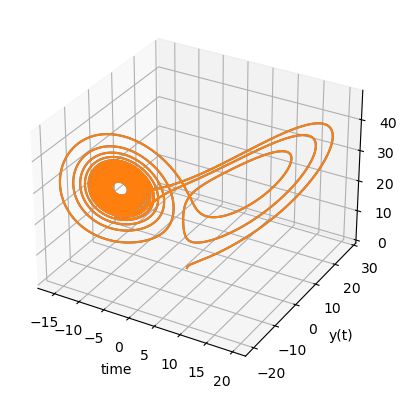

In [10]:
s = 10
b = 8/3
p = 28
e = 0.00001


def chaos(y,t):
    xf = y[0]
    yf = y[1]
    zf = y[2]
    dxfdt = s*(yf-xf)
    dyfdt = xf*(p-zf)-yf
    dzfdt = xf*yf-b*zf
    return[dxfdt,dyfdt,dzfdt]
    
# initial condition
y0 = [1,0,0]
y1 = [1+e,0,0]

# time points
t = np.linspace(0,20,20000) #by default size of linspace is 50

# solve ODE
y = odeint(chaos,y0,t)
ye = odeint(chaos,y1,t)

# plot results : the solution over time
ax = plt.axes(projection='3d')


xax = y[:,0] 
yax = y[:,1] 
zax = y[:,2] 

xae = ye[:,0]
yae = ye[:,1]
zae = ye[:,2]
ax.plot3D(xax,yax,zax)
ax.plot3D(xae,yae,zae)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()
print()

# Data fitting

(a) Copy past the data in a file that you can read and format with Numpy

In [11]:
data = np.fromfile('fichier.txt', sep='\n', dtype=float)
data = data.reshape((-1, 2))

(b) Plot the data - try to also plot log(y) with respect to t (hints : semilogy or take
le log) - does it work ?

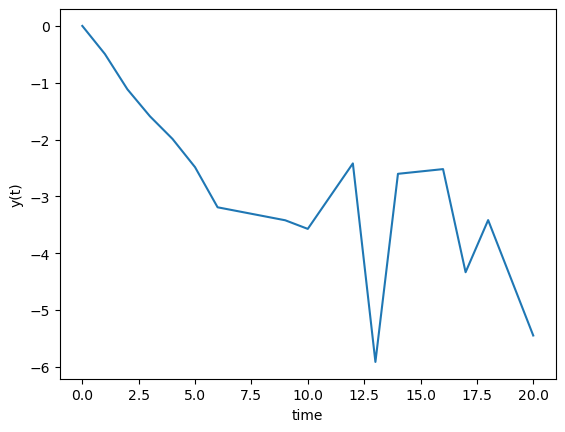

In [12]:
d1 = data[np.where(data[:,1]>0)]
#d1 = d1.reshape((-1,2))
plt.plot(d1[:,0],np.log(d1[:,1]))
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()


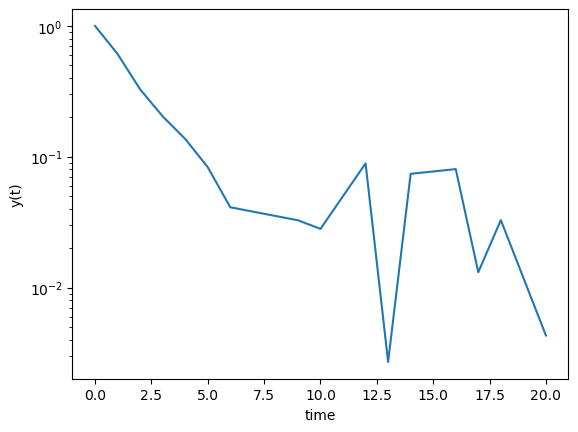

In [13]:
plt.semilogy(d1[:,0],d1[:,1])
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

(c) Linear and polynomial fits are available in Numpy. Can you find a slope for the
log of the data ? (use the help of Numpy functions).

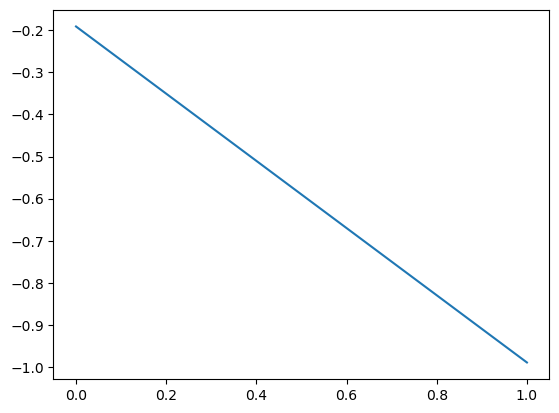

In [14]:
logy = np.log(d1[:,1])
p = np.polyfit(d1[:,0],logy,1)
plt.plot(p)

It seems you can obtain a linear fit of the log of the data : it suggest that the
data follows an exponential function y(t) = exp(kt). Can you find k (hint :
previous slope) ?
Here we will choose to have a positive parameter k so we will now consider the
function y(t) = exp(−kt)

In [15]:
k =p[0]

(e) Compare the data and the exponential function that you found. The two curves
are close, but in what sens ? Write a function sse that computes the square
distance between your function and the data

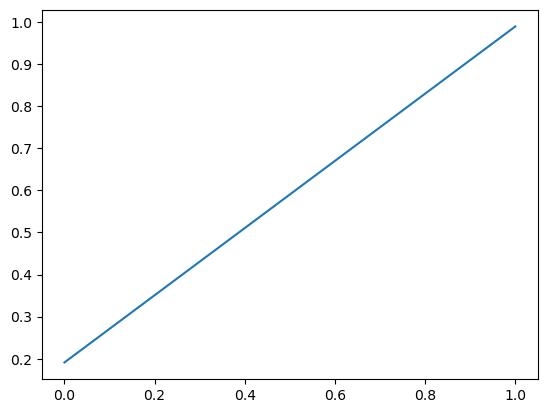

In [16]:
d2 = np.abs(d1)
logy2 = np.log(d2[:,1])
p2 = np.abs(np.polyfit(d2[:,0],logy2,1))

plt.plot(p2)

In [17]:
def sse(k,data):
    return np.sum(np.square(data[:,1]-np.exp(-k*data[:,0])))


In [18]:
print(sse(-k,d1))
print(sse(-k,data))

0.6197810458150517
0.8169767078329766


In [19]:
from scipy.optimize import fmin

In [37]:
fdata=fmin(sse,-k,args=(data,))

Optimization terminated successfully.
         Current function value: 0.036807
         Iterations: 16
         Function evaluations: 32


In [38]:
fd1=fmin(sse,-k,args=(d1,))

Optimization terminated successfully.
         Current function value: 0.022927
         Iterations: 16
         Function evaluations: 32


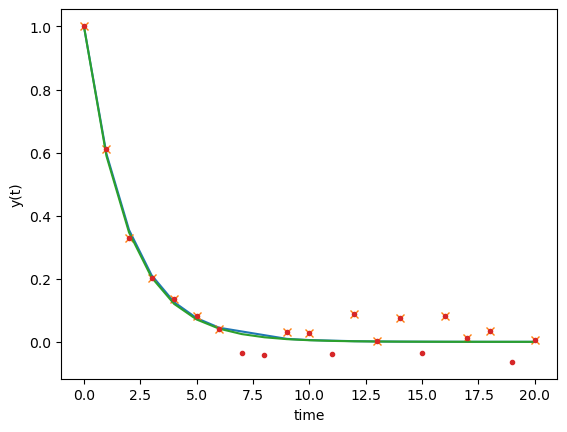

In [57]:
plt.plot(d1[:,0],np.exp(d1[:,0]*(-fd1)))
plt.plot(d1[:,0],d1[:,1],"x")
plt.plot(data[:,0],np.exp(data[:,0]*(-fdata)))
plt.plot(data[:,0],data[:,1],".")
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

2. In order to train yourself you are going to estimate parameter with different type
of function. To do so, we are going to create data (also called synthetic data -
different from measured data). Synthetic data are created with the model function
adding noise.
(a) Implement a function f (x, k) = xr exp(−k ∗ x)

In [60]:
def f(x,k,r):
    return (x**r)*np.exp(-k*x)

(b) Choose a value for r and k, and create data for a vector x = [0, 10] of size N
(N is a parameter that can be changed).

In [70]:
N = 10
r = 2
k = 0.5

x = np.linspace(0,10,N)
y = np.array([f(i,k,r) for i in x])

sig = 0.001

yb = y + sig * np.random.randn(N)
print(yb)


[4.18172037e-04 7.09534002e-01 1.62527508e+00 2.09834550e+00
 2.14027517e+00 1.91979248e+00 1.58509587e+00 1.23828107e+00
 9.27403558e-01 6.72435534e-01]
